# oakland-crime


## 1.数据可视化和摘要


这是由加利福尼亚州奥克兰市托管的数据集。 记录的是当地发生的各类突发事件。

Name：oakland-crime-statistics-2011-to-2016


In [11]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np


df = pd.read_csv('records-for-2011.csv', index_col=0)
df.head()

,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time
Agency,,,,,,,,,
OP,2011-01-01T00:00:00.000,ST&SAN PABLO AV,1.0,06X,1.0,PDOA,POSSIBLE DEAD PERSON,LOP110101000001,2011-01-01T00:28:17.000
OP,2011-01-01T00:01:11.000,ST&HANNAH ST,1.0,07X,1.0,415GS,415 GUNSHOTS,LOP110101000002,2011-01-01T01:12:56.000
OP,2011-01-01T00:01:25.000,ST&MARKET ST,1.0,10Y,2.0,415GS,415 GUNSHOTS,LOP110101000003,2011-01-01T00:07:20.000
OP,2011-01-01T00:01:35.000,PRENTISS ST,2.0,21Y,2.0,415GS,415 GUNSHOTS,LOP110101000005,2011-01-01T00:02:28.000
OP,2011-01-01T00:02:10.000,AV&FOOTHILL BLVD,2.0,20X,1.0,415GS,415 GUNSHOTS,LOP110101000004,2011-01-01T00:50:04.000



### 1.1 数据摘要


- 标称属性和数值属性


In [12]:
numeric_fields = df.select_dtypes(include=np.number).columns.values
nominal_fields = df.select_dtypes(exclude=np.number).columns.values
print('Numeric fields:', numeric_fields)
print('Nominal fields:', nominal_fields)

Numeric fields: ['Area Id' 'Priority']
Nominal fields: ['Create Time' 'Location' 'Beat' 'Incident Type Id'
 'Incident Type Description' 'Event Number' 'Closed Time']



标称属性，给出每个可能聚会的频数


In [13]:
for name in nominal_fields:
    print(df.groupby(name).size())

Create Time
2011-01-01T00:00:00.000    1
2011-01-01T00:01:11.000    1
2011-01-01T00:01:25.000    1
2011-01-01T00:01:35.000    1
2011-01-01T00:02:10.000    1
                          ..
2011-12-31T23:51:14.000    1
2011-12-31T23:52:15.000    1
2011-12-31T23:53:59.000    1
2011-12-31T23:55:52.000    1
2011-12-31T23:58:08.000    1
Length: 179451, dtype: int64
Location
                         43
 & DENNISON ST            5
 & E18TH ST               1
 & MILES                  1
 & SKYLINE                1
                         ..
WB W GRAND AV             1
WB WRIGHT ST              1
WERNER 40TH STREET WY     1
WOOD AV&KEMPTON AV        1
WOODSON B ST              1
Length: 32505, dtype: int64
Beat
01X     2210
02X     2614
02Y     2970
03X     3819
03Y     2726
04X     7410
05X     2633
05Y      710
06X     5119
07X     4134
08X     6885
09X     3630
10X     2967
10Y     2383
11X     2087
12X     2422
12Y     2651
13X     1122
13Y     2017
13Z     2546
14X     2733
14Y     1492
15X 


数值属性，给出5数概括及缺失值的个数


In [14]:
describe = df.describe()
total = len(df)
data = {}
for field in describe.columns:
    data[field] = total - describe[field]['count']

describe = describe.append(pd.Series(data, name='miss'))
describe

,Area Id,Priority
count,179112.000000,180015.000000
mean,1.740648,1.796111
std,0.746468,0.402916
min,1.000000,0.000000
25%,1.000000,2.000000
50%,2.000000,2.000000
75%,2.000000,2.000000
max,3.000000,2.000000
miss,904.000000,1.000000



### 1.2 数据的可视化


- 针对数值属性: 绘制直方图，用qq图检验其分布是否为正态分布。



Area Id属性不符合正态分布。


C:\Users\yjn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\yjn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\yjn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


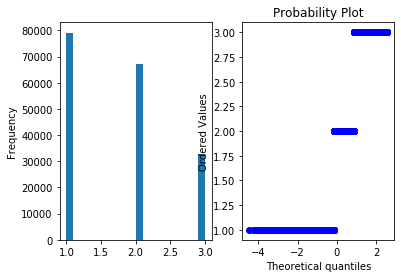

In [15]:
def hist_and_qqplot(series): 
    plt.subplot(1, 2, 1)
    series.plot.hist(bins=20)
    plt.subplot(1, 2, 2)
    stats.probplot(series, dist="norm", plot=pylab)
    
hist_and_qqplot(df['Area Id'])


Priority属性不符合正态分布。


C:\Users\yjn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\yjn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\yjn\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


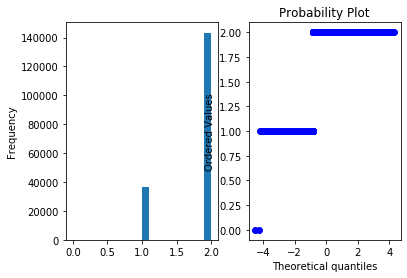

In [16]:
hist_and_qqplot(df['Priority'])


- 针对数值属性: 绘制盒图，对离群值进行识别
    

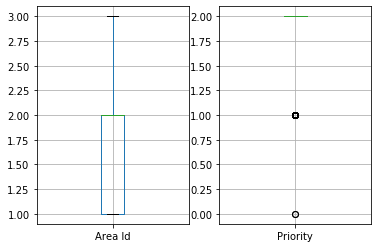

In [17]:
plt.subplot(1, 2, 1)
df.boxplot('Area Id')
plt.subplot(1, 2, 2)
df.boxplot('Priority')


## 2. 数据缺失的处理



### 2.1 缺失数据原因分析

观察数据集中缺失数据，分析其缺失的原因。

缺失数据主要集中在Area Id 和 Beat。 Area Id表示区域编码，因为前面有Location作为地址，由于粒度比较低，所以造成缺失。


分别使用下列四种策略对缺失值进行处理:



- 将缺失部分剔除


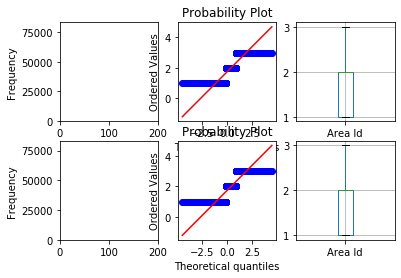

In [18]:
new_df = df.dropna(subset=['Area Id'])


def plot_contract(dataframe, row):
    plt.subplot(2, 3, 1+3*row)
    new_df['Area Id'].plot.hist(bins=500, xlim=(0, 200))
    plt.subplot(2, 3, 2+3*row)
    stats.probplot(new_df['Area Id'], dist="norm", plot=pylab)
    plt.subplot(2, 3, 3+3*row)
    df.boxplot('Area Id')


plot_contract(df, 0)
plot_contract(new_df, 1)


- 用最高频率值来填补缺失值


1.0


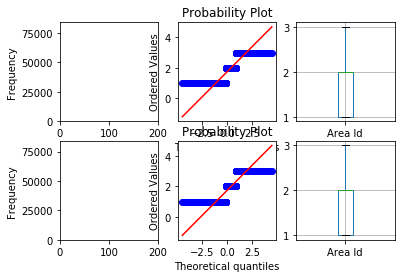

In [19]:
mode = df.mode()['Area Id'][0]
new_df = df.fillna({'Area Id': mode})
print(mode)

plot_contract(df, 0)
plot_contract(new_df, 1)

数值属性Area Id 和 Priority分别表示地区编号和事件优先级，因而取值范围有限，也没有明确的与其他属性的相关关系，因而很难通过数据对象相关性和属性相关性进行缺失值的填充。